In [1]:
# Pre-work: Staging my Environment

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [2]:
# Question 1: Create dataframe object from .csv file

cdemo16 = pd.read_csv('county_demographics_2016.csv', sep=',', header=0, index_col=0)

# Question 1: Display first 5 rows of dataframe object
cdemo16.head()

,adult_pop,female_pop,male_pop,median_age,population,pct_poverty,median_income,pct_highschool,pct_unemployed
fips,,,,,,,,,
1001,41890.0,28422.0,26994.0,38.6,55416.0,13.5,54487.0,87.6,3.4
1003,163233.0,107322.0,101241.0,42.9,208563.0,11.7,56460.0,90.0,3.7
1005,20477.0,12186.0,13779.0,40.1,25965.0,29.9,32884.0,73.8,6.2
1007,17944.0,10498.0,12145.0,39.6,22643.0,20.1,43079.0,80.7,3.5
1009,44322.0,29206.0,28498.0,41.1,57704.0,14.1,47213.0,80.0,3.0


In [3]:
# QA -- Cleaning Data, Missing & Infinite Values

# Check for missing values
# print(pd.isnull(cdemo16).sum())

# Check for infinity
# print(np.isfinite(cdemo16).all())

# QA Results: Replace infinite values with NaN

cdemo16.replace([np.inf, -np.inf], np.nan)

# QA Results: Drop missing values/NaN

modcdemo16 = cdemo16.dropna()

# QA Results: Check New DataFrame
# print(pd.isnull(modcdemo16).sum())
# print(np.isfinite(modcdemo16).all())

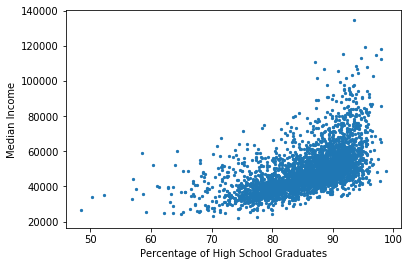

In [4]:
# Question 2: Creating variables for the scatterplot
pctHS = modcdemo16.pct_highschool
medinc = modcdemo16.median_income

# Question 2: Creation of scatterplot of relationship between median income (y-axis) & percentage of high school graduates (x-axis)
plt.scatter(pctHS, medinc, s = 5)
# I changed the size of the scatterplot dots because I didn't like that they looked like one giant mass of blue in the graph; I have scaled all subsequent graph markers to this size.
plt.xlabel("Percentage of High School Graduates")
plt.ylabel("Median Income")
plt.show()

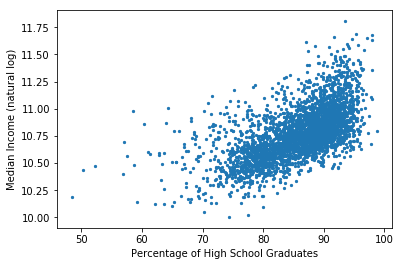

In [5]:
# Question 3: Create new variable (natural log of median income)
lnmedinc = np.log(medinc)

# Question 3: Creation of new scatterplot
plt.scatter(pctHS, lnmedinc, s = 5)
plt.xlabel("Percentage of High School Graduates")
plt.ylabel("Median Income (natural log)")
plt.show()

## Relationship between percentage of high school graduates and median income

The transformation of variable 'medinc' to log variable 'lnmedinc' highlights a linear pattern in the relationship between median income and percentage of high school graduates from a given area. The relationship appears to be a positively correlated relationship. Put another way, the relationship is that the median income of a given area is high where the percentage of high school graduates is also high, and low where the percentage is low. 

In [6]:
#Question 4: Creating a feature matrix and target array
pct = pctHS[:, np.newaxis]

# QA: Check shape
# pct.shape
# QA: Check shape
# lnmedinc.shape

In [7]:
#Question 5: Creating a linear regression model with an intercept
model = LinearRegression(fit_intercept=True)
model

# Question 5: Fitting the regression model
model.fit(pct, lnmedinc)

# Question 5: Regression model parameter: Coefficient of percentage of high school graduates
model.coef_

array([0.02258908])

In [8]:
# Question 6: Generating line of best fit by creating an array of 100 observations within the range of pctHS

print(pctHS.describe())
pctHSfit = np.linspace(48.5, 98.7, num=100)
pctHSfit

count    3140.000000
mean       85.812452
std         6.542260
min        48.500000
25%        81.700000
50%        87.250000
75%        90.700000
max        98.700000
Name: pct_highschool, dtype: float64


array([48.5       , 49.00707071, 49.51414141, 50.02121212, 50.52828283,
       51.03535354, 51.54242424, 52.04949495, 52.55656566, 53.06363636,
       53.57070707, 54.07777778, 54.58484848, 55.09191919, 55.5989899 ,
       56.10606061, 56.61313131, 57.12020202, 57.62727273, 58.13434343,
       58.64141414, 59.14848485, 59.65555556, 60.16262626, 60.66969697,
       61.17676768, 61.68383838, 62.19090909, 62.6979798 , 63.20505051,
       63.71212121, 64.21919192, 64.72626263, 65.23333333, 65.74040404,
       66.24747475, 66.75454545, 67.26161616, 67.76868687, 68.27575758,
       68.78282828, 69.28989899, 69.7969697 , 70.3040404 , 70.81111111,
       71.31818182, 71.82525253, 72.33232323, 72.83939394, 73.34646465,
       73.85353535, 74.36060606, 74.86767677, 75.37474747, 75.88181818,
       76.38888889, 76.8959596 , 77.4030303 , 77.91010101, 78.41717172,
       78.92424242, 79.43131313, 79.93838384, 80.44545455, 80.95252525,
       81.45959596, 81.96666667, 82.47373737, 82.98080808, 83.48

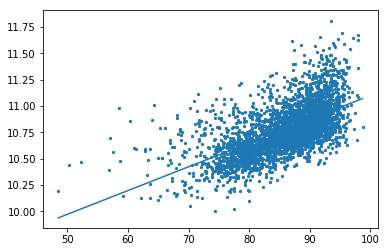

In [9]:
# Question 7: Overlaying scatterplot with new line of best fit

PCTfit = pctHSfit[:, np.newaxis]
medincfit = model.predict(PCTfit)
plt.scatter(pctHS, lnmedinc, s = 5)
plt.plot(pctHSfit, medincfit)

## A Note re: Question 6

I was very confused over what Question 6 was asking. I initially took it as "Create 100 new random observations not originally in the dataset, then predict their y-values, then plot the new data". It felt strange, and upon re-reading the problem set I figured what was meant was "create the line of best fit using np.linspace", but just in case: please find below the code I used to achieve creating 100 new random inputs, predict the outputs for those inputs, then graph them.

```python
## Question 6(1): Creating a random set of inputs
pctrandom = np.random.uniform(40,100,100)
## QA check: print(pctrandom)
## Question 6(1): Creating new feature matrix & target array for new inputs
pctr = pctrandom[:, np.newaxis]
pctr.shape
##Question 6(1): Predict output values
medincpredict = model.predict(pctr)
medincpredict.shape
## Question 6(1): Regression fit 1: Creating the line of best fit
pctrfit = np.linspace(40, 100)
pctrfit
## Question 7(1): Regression fit 2: Creating the scatterplot of projected outputs from randomized inputs 
PCTRfit = pctrfit[:, np.newaxis]
medfit = model.predict(PCTRfit)
plt.scatter(pctrandom, medincpredict, s = 5)
plt.plot(PCTRfit, medfit)
```